In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [6]:
cm_all_ages_df = pd.read_csv('WHO_mortality_data\ghe2015_deaths_country_allages.csv')

In [7]:
cm_all_ages_df.columns

Index(['iso3', 'cause2015', 'causename', 'sex', 'age', 'agegroup', 'dths2000',
       'low2000', 'upp2000', 'dths2001', 'low2001', 'upp2001', 'dths2002',
       'low2002', 'upp2002', 'dths2003', 'low2003', 'upp2003', 'dths2004',
       'low2004', 'upp2004', 'dths2005', 'low2005', 'upp2005', 'dths2006',
       'low2006', 'upp2006', 'dths2007', 'low2007', 'upp2007', 'dths2008',
       'low2008', 'upp2008', 'dths2009', 'low2009', 'upp2009', 'dths2010',
       'low2010', 'upp2010', 'dths2011', 'low2011', 'upp2011', 'dths2012',
       'low2012', 'upp2012', 'dths2013', 'low2013', 'upp2013', 'dths2014',
       'low2014', 'upp2014', 'dths2015', 'low2015', 'upp2015'],
      dtype='object')

In [22]:
cm_filter = ['iso3', 'cause2015', 'causename', 'sex']
dths_filter = [col for col in cm_all_ages_df if col.startswith('dths')]
cm_filter.extend(dths_filter)
cm_all_ages_dths_df = cm_all_ages_df[cm_filter]
cm_all_ages_dths_df.rename(columns=lambda x: x.replace('dths', ''), inplace=True)

In [30]:
# This pulls out all of the unique causes of mortality 
causes = cm_all_ages_dths_df['causename'].unique()
causes[5]

'Syphilis'

In [33]:
years = [yr.replace('dths','') for yr in dths_filter]
years

['2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015']

In [63]:
cause_number = 2
cm_all_ages_cause_dths = cm_all_ages_dths_df[cm_all_ages_dths_df['causename'] == causes[cause_number]]
tmp = cm_all_ages_cause_dths.pivot_table(index='iso3', values=years)
tmp.rename(columns=lambda x: pd.to_datetime(x), inplace=True)

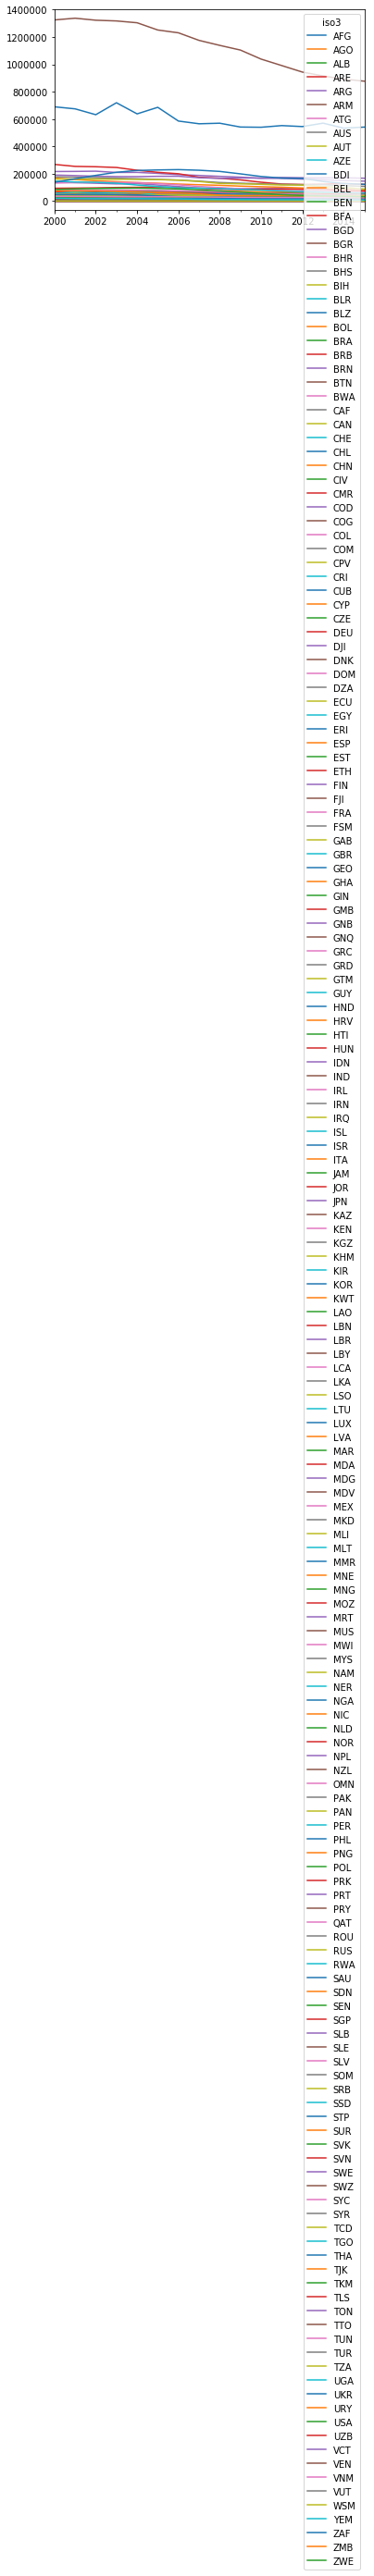

In [71]:
type(tmp)
type(tmp.columns)
tmp.T.plot()

# tmp.plot(index=tmp.columns, columns=tmp.index)
# pd.to_datetime('2010')